In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline as CS
from scipy.signal import square, sawtooth

* [0 Homepage](#0-Homepage)
* [1 Linear Systems](#1-Linear-Systems)
  * [1.1 Solutions of Linear Systems](#1.1-Solutions-of-Linear-Systems)
  * [1.2 Error Analysis](#1.2-Error-Analysis)
  * [1.3 Interpolation](#1.3-Interpolation)
  * [1.4 Differential Equations](#1.4-Differential-Equations)
* [2 Orthogonality](#2-Orthogonality)
  * [2.1 Subspaces](#2.1-Subspaces)
  * [2.2 Orthogonal Subspaces](#2.2-Orthogonal-Subspaces)
  * [2.3 Orthogonal Projection](#2.3-Orthogonal-Projection)
  * [2.4 QR Decomposition](#2.4-QR-Decomposition)
  * [2.5 Least Squares Approximation](#2.5-Least-Squares-Approximation)
* [3 Eigenvalues](#3-Eigenvalues)
  * [3.1 Diagonalization](#3.1-Diagonalization)
  * [3.2 SVD](#3.2-SVD)
  * [3.3 Computing Eigenvalues](#3.3-Computing-Eigenvalues)
* [4 DFT](#4-DFT)
  * [4.1 Complex Vectors](#4.1-Complex-Vectors)
  * [4.2 Discrete Fourier Transform](#4.2-Discrete-Fourier-Transform)
  * [4.3 Frequency, Amplitude and Phase](#4.3-Frequency,-Amplitude-and-Phase)
  * [4.4 Fast Fourier Transform](#4.4-Fast-Fourier-Transform)
  * [4.5 Convolution and Filtering](#4.5-Convolution-and-Filtering)

# 0 Homepage

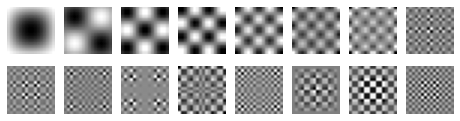

In [2]:
N = 16
c = np.zeros(N)
c[:4] = np.array([1.0,0.75,0.5,0.25])
A = la.toeplitz(c)
P,S,QT = la.svd(A)
plt.figure(figsize=(8,2))
for n in range(0,16):
    plt.subplot(2,8,n+1)
    plt.imshow(S[n]*np.outer(P[:,n],QT[n,:]),cmap='binary')
    plt.axis(False)
plt.savefig('00_01.png',bbox_inches='tight',pad_inches=0.0)
plt.show()

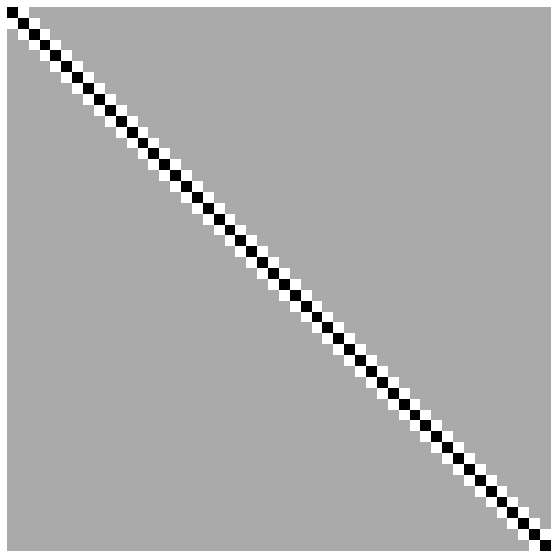

In [3]:
N = 50
A = np.diag(np.repeat(2,N)) + np.diag(np.repeat(-1,N-1),1) + np.diag(np.repeat(-1,N-1),-1)
plt.figure(figsize=(10,10))
plt.imshow(A,cmap='binary')
plt.axis(False)
plt.savefig('00_02.png',dpi=300,bbox_inches='tight',pad_inches=0.0)
plt.show()

# 1 Linear Systems

## 1.1 Solutions of Linear Systems

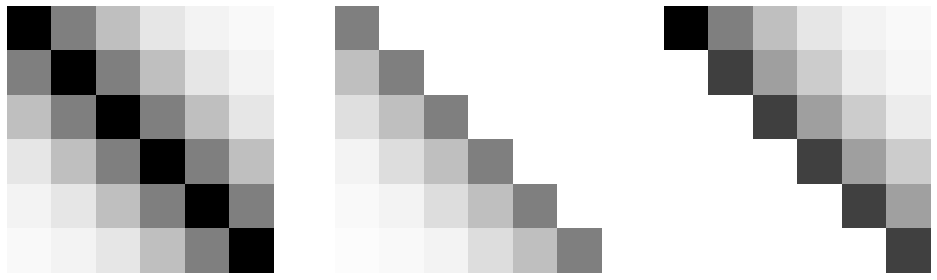

In [4]:
A = la.toeplitz([2,1,0.5,0.2,0.1,0.05])
P,L,U = la.lu(A)
plt.figure(figsize=(14,4))
plt.subplot(1,3,1), plt.imshow(A,cmap='binary'), plt.axis(False), plt.clim([0,2])
plt.subplot(1,3,2), plt.imshow(L,cmap='binary'), plt.axis(False), plt.clim([0,2])
plt.subplot(1,3,3), plt.imshow(U,cmap='binary'), plt.axis(False), plt.clim([0,2])
plt.tight_layout()
plt.savefig('01_01_01.png',dpi=300)
plt.show()

## 1.2 Error Analysis

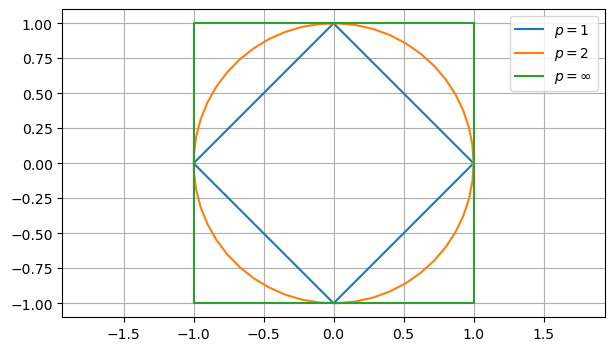

In [15]:
theta = np.linspace(0,2*np.pi,50)
plt.figure(figsize=(7,4))
plt.plot([1,0,-1,0,1],[0,1,0,-1,0])
plt.plot(np.cos(theta),np.sin(theta))
plt.plot([1,-1,-1,1,1],[1,1,-1,-1,1])
plt.axis('equal'), plt.grid(True), plt.legend(['$p=1$','$p=2$','$p=\infty$'],loc='upper right')
plt.savefig('01_02_01.png',dpi=300)
plt.show()

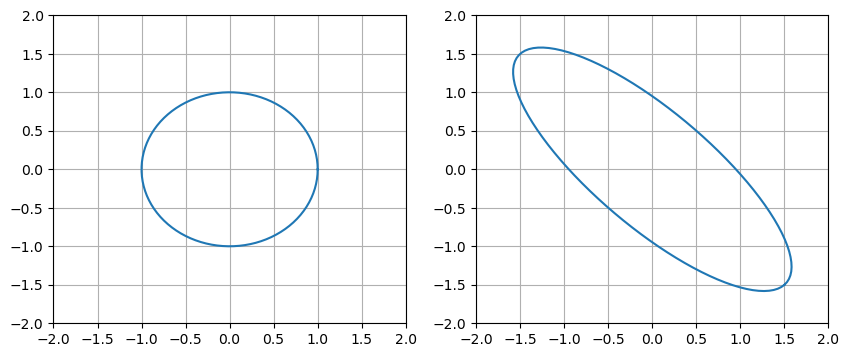

In [16]:
theta = -np.pi/4
d1 = 1.5*np.sqrt(2)
d2 = 0.5*np.sqrt(2)
A = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]]) @ np.diag([d1,d2])
T = np.linspace(0,2*np.pi,100)
S = np.vstack([np.cos(T),np.sin(T)])
AS = A@S
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
ax1.plot(S[0,:],S[1,:])
ax1.grid(True); ax1.axis([-2,2,-2,2])
ax2.plot(AS[0,:],AS[1,:])
ax2.grid(True); ax2.axis([-2,2,-2,2])
plt.savefig('01_02_02.png',dpi=300)
plt.show()

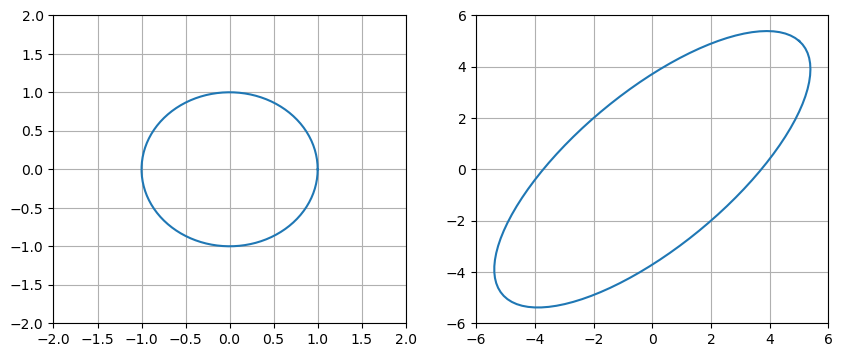

In [17]:
theta = np.pi/4
d1 = 5*np.sqrt(2)
d2 = 2*np.sqrt(2)
A = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]]) @ np.diag([d1,d2])
T = np.linspace(0,2*np.pi,100)
S = np.vstack([np.cos(T),np.sin(T)])
AS = A@S
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
ax1.plot(S[0,:],S[1,:])
ax1.grid(True); ax1.axis([-2,2,-2,2])
ax2.plot(AS[0,:],AS[1,:])
ax2.grid(True); ax2.axis([-6,6,-6,6])
plt.savefig('01_02_03.png',dpi=300)
plt.show()

## 1.3 Interpolation

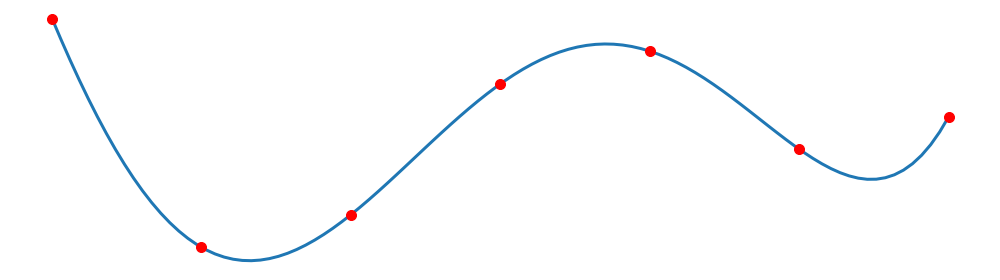

In [7]:
t = [-1,0,1,2,3,4,5]
y = [4,-3,-2,2,3,0,1]
A = np.vander(t,increasing=True)
c = la.solve(A,y)
#p = CS(t,y,bc_type="natural")
T = np.linspace(t[0],t[-1],100)
Y = sum([c[n]*T**n for n in range(len(c))])
plt.figure(figsize=(14,4))
plt.plot(T,Y,'C0',lw=3)
#plt.plot(T,p(T),'C0')
plt.plot(t,y,'r.',ms=20), plt.axis(False)
plt.tight_layout()
plt.savefig('01_03_01.png',dpi=300)
plt.show()

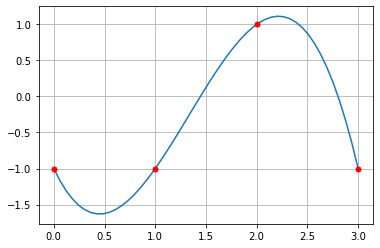

In [8]:
t = [0,1,2,3]
y = [-1,-1,1,-1]
A = np.vander(t,increasing=True)
c = la.solve(A,y)
T = np.linspace(0,3,50)
Y = sum([c[n]*T**n for n in range(len(c))])
plt.plot(T,Y), plt.plot(t,y,'r.',ms=10), plt.grid(True)
plt.savefig('01_03_02.png',dpi=300)
plt.show()

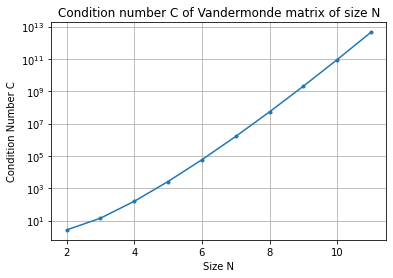

In [33]:
N = 11
Ns = np.arange(2,N+1)
Cs = []
for n in Ns:
    t = np.arange(0,n)
    A = np.vander(t)
    C = np.linalg.cond(A)
    Cs.append(C)
plt.semilogy(Ns,Cs,'C0.-')
plt.grid(True), plt.title('Condition number C of Vandermonde matrix of size N')
plt.xlabel('Size N'), plt.ylabel('Condition Number C')
plt.savefig('01_03_03.png',dpi=300)
plt.show()

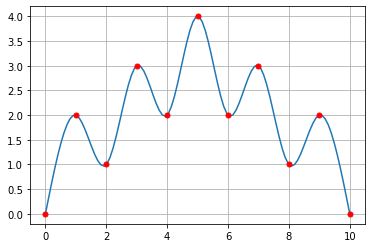

In [22]:
t = [0,1,2,3,4,5,6,7,8,9,10]
y = [0,2,1,3,2,4,2,3,1,2,0]
p = CS(t,y,bc_type="natural")
ts = np.linspace(0,10,100)
ys = p(ts)
plt.plot(ts,ys,t,y,'r.',ms=10)
plt.grid(True)
plt.savefig('01_03_04.png',dpi=300)
plt.show()

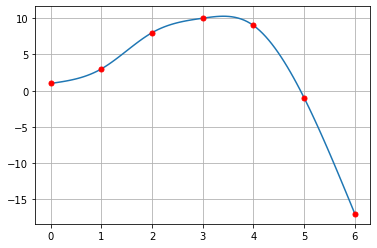

In [23]:
t = range(0,7)
y = [1,3,8,10,9,-1,-17]
p = CS(t,y,bc_type="natural")
ts = np.linspace(0,6,100)
ys = p(ts)
plt.plot(ts,ys,t,y,'r.',ms=10)
plt.grid(True)
plt.savefig('01_03_05.png',dpi=300)
plt.show()

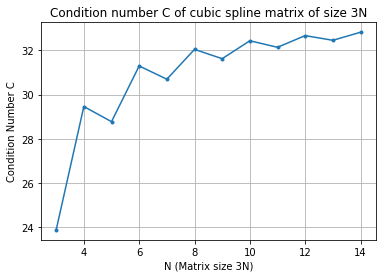

In [25]:
def cubicM(N):
    L = 1
    A = np.array([[L**3,L**2,L],[3*L**2,2*L,1],[6*L,2,0]])
    B = np.array([[0,0,0],[0,0,-1],[0,-2,0]])
    T = np.array([[0,0,0],[0,2,0],[0,0,0]])
    V = np.array([[L**3,L**2,L],[0,2,0],[6*L,2,0]])

    M1 = la.block_diag(*[A for _ in range(1,N)])
    M1 = np.hstack((M1,np.zeros((3*(N - 1),3))))
    M2 = la.block_diag(*[B for _ in range(1,N)])
    M2 = np.hstack((np.zeros((3*(N - 1),3)),M2))
    M = M1 + M2
    C = np.hstack((T,np.zeros((3,3*(N - 2))),V))
    M = np.vstack((M,C))
    return M

Ns = np.arange(3,15)
Cs = []
for N in Ns:
    M = cubicM(N)
    CN = np.linalg.cond(M)
    Cs.append(CN)
plt.plot(Ns,Cs,'C0.-')
plt.grid(True), plt.title('Condition number C of cubic spline matrix of size 3N')
plt.xlabel('N (Matrix size 3N)'), plt.ylabel('Condition Number C')
plt.savefig('01_03_06.png',dpi=300)
plt.show()

## 1.4 Differential Equations

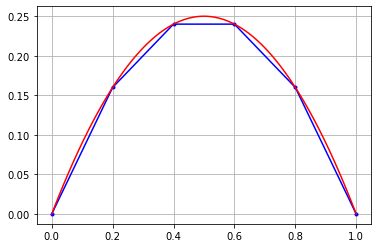

In [12]:
alpha = 0; beta = 0; N = 4;
t0 = 0; tf = 1; h = (tf - t0)/(N + 1);
t = np.linspace(t0,tf,N+2)
r = -2*np.ones(t.size)
A = np.diag(np.repeat(-2,N)) + np.diag(np.repeat(1,N-1),1) + np.diag(np.repeat(1,N-1),-1)
b = h**2*r[1:N+1] - np.concatenate([alpha,np.zeros(N-2),beta],axis=None)
y = la.solve(A,b)
solution = np.concatenate([alpha,y,beta],axis=None)
plt.plot(t,solution,'b.-')
T = np.linspace(t0,tf,100)
Y = T*(1 - T)
plt.plot(T,Y,'r')
plt.grid(True)
plt.savefig('01_04_01.png',dpi=300)
plt.show()

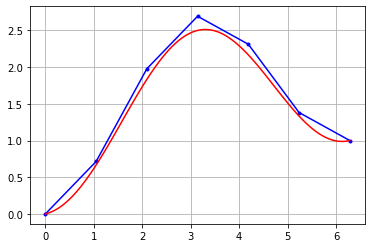

In [13]:
alpha = 0; beta = 1; N = 5;
t0 = 0; tf = 2*np.pi; h = (tf - t0)/(N + 1);
t = np.linspace(t0,tf,N+2)
r = np.cos(t)
A = np.diag(np.repeat(-2,N)) + np.diag(np.repeat(1,N-1),1) + np.diag(np.repeat(1,N-1),-1)
b = h**2*r[1:N+1] - np.concatenate([alpha,np.zeros(N-2),beta],axis=None)
y = la.solve(A,b)
solution = np.concatenate([alpha,y,beta],axis=None)
plt.plot(t,solution,'b.-')
T = np.linspace(t0,tf,100)
Y = 1 - np.cos(T) + T/2/np.pi
plt.plot(T,Y,'r')
plt.grid(True)
plt.savefig('01_04_02.png',dpi=300)
plt.show()

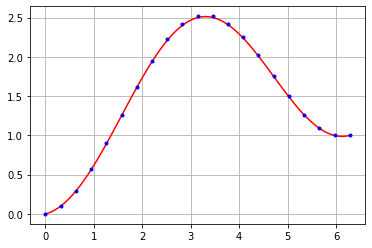

In [14]:
alpha = 0; beta = 1; N = 19;
t0 = 0; tf = 2*np.pi; h = (tf - t0)/(N + 1);
t = np.linspace(t0,tf,N+2)
r = np.cos(t)
A = np.diag(np.repeat(-2,N)) + np.diag(np.repeat(1,N-1),1) + np.diag(np.repeat(1,N-1),-1)
b = h**2*r[1:N+1] - np.concatenate([alpha,np.zeros(N-2),beta],axis=None)
y = la.solve(A,b)
solution = np.concatenate([alpha,y,beta],axis=None)
T = np.linspace(t0,tf,100)
Y = 1 - np.cos(T) + T/2/np.pi
plt.plot(T,Y,'r')
plt.plot(t,solution,'b.')
plt.grid(True)
plt.savefig('01_04_03.png',dpi=300)
plt.show()

$$
y'' + p(t)y' + q(t)y = r(t)
$$

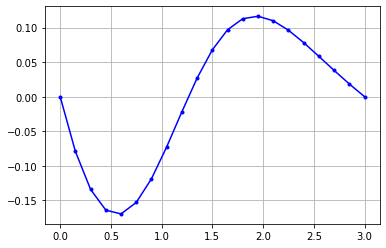

In [15]:
alpha = 0; beta = 0; N = 19;
t0 = 0; tf = 3; h = (tf - t0)/(N + 1);
ts = np.linspace(t0,tf,N+2)

p = lambda t: t**2
ps = p(ts)
q = lambda t: np.ones(t.size)
qs = q(ts)
r = lambda t: np.cos(t)
rs = r(ts)

a = 1 - h*ps/2
b = h**2*qs - 2
c = 1 + h*ps/2
A = np.diag(b[1:N+1]) + np.diag(c[1:N],1) + np.diag(a[2:N+1],-1)

b = h**2*rs[1:N+1] - np.concatenate([a[1]*alpha,np.zeros(N-2),c[N]*beta],axis=None)
y = la.solve(A,b)

solution = np.concatenate([alpha,y,beta],axis=None)
plt.plot(ts,solution,'b.-')
plt.grid(True)
plt.savefig('01_04_04.png',dpi=300)
plt.show()

# 2 Orthogonality

## 2.1 Subspaces

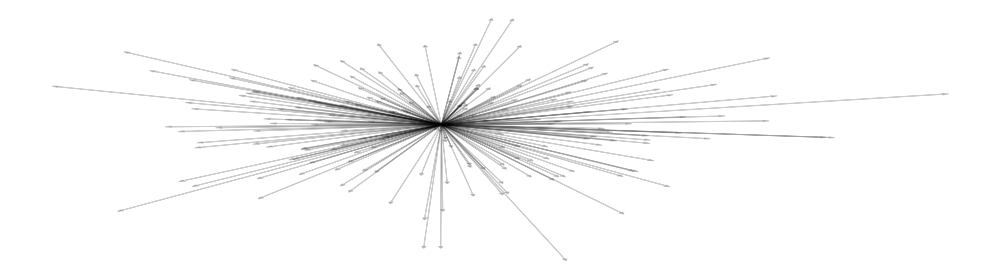

In [162]:
plt.figure(figsize=(14,4))
for _ in range(0,200):
    plt.arrow(0,0,np.random.randn(),np.random.randn(),width=0.0001,head_width=0.03,alpha=0.2,color='k')
plt.axis(False)
plt.tight_layout()
plt.savefig('02_01_01.png',dpi=300)
plt.show()

## 2.2 Orthogonal Subspaces

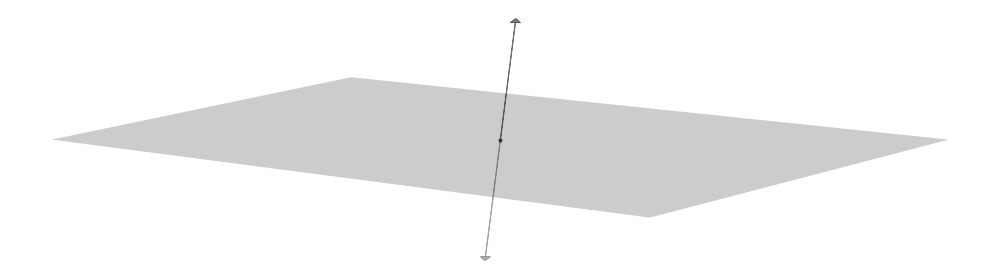

In [103]:
plt.figure(figsize=(14,4))
plt.arrow(0.5,1,-0.05,-1.5,color='k',head_width=0.035,alpha=0.3)
plt.fill([-1,0,2,1],[1,1.8,1,0],'k',alpha=0.2)
plt.arrow(0.5,1,0.05,1.5,color='k',head_width=0.035,alpha=0.5)
plt.plot(0.5,1,'k.',alpha=0.6,ms=6)
plt.axis(False)
plt.tight_layout()
plt.savefig('02_02_01.png',dpi=300)
plt.show()

## 2.3 Orthogonal Projection

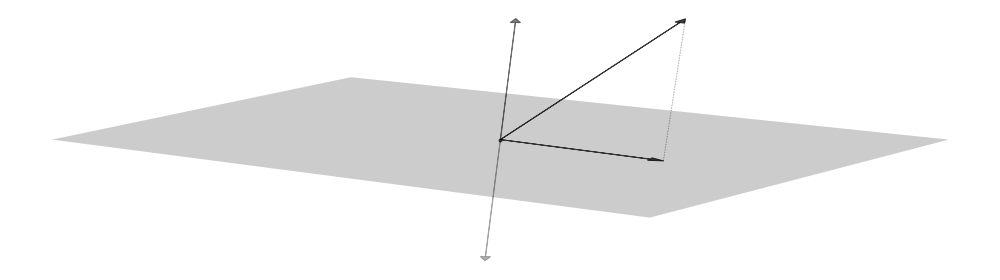

In [150]:
plt.figure(figsize=(14,4))
plt.arrow(0.5,1,-0.05,-1.5,color='k',head_width=0.035,alpha=0.3)
plt.fill([-1,0,2,1],[1,1.8,1,0],'k',alpha=0.2)
plt.arrow(0.5,1,0.05,1.5,color='k',head_width=0.035,alpha=0.5)
plt.arrow(0.5,1,0.5,-0.25,color='k',head_width=0.035,alpha=0.75)
plt.arrow(0.5,1,0.6,1.5,color='k',head_width=0.035,alpha=0.75)
plt.arrow(1.045,0.72,0.073,1.8,color='k',head_width=0.0,alpha=0.2,ls=':')
plt.plot(0.5,1,'k.',alpha=0.6,ms=6)
plt.axis(False)
plt.tight_layout()
plt.savefig('02_03_01.png',dpi=300)
plt.show()

## 2.4 QR Decomposition

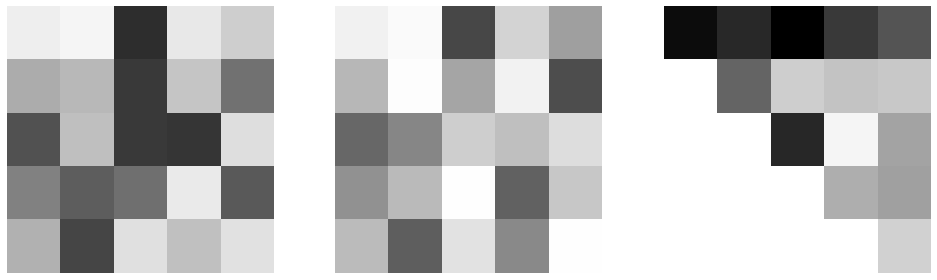

In [20]:
A = np.random.rand(5,5)
Q,R = la.qr(A)
plt.figure(figsize=(14,4))
plt.subplot(1,3,1), plt.imshow(np.abs(A),cmap='binary'), plt.axis(False), plt.clim([0,1.2])
plt.subplot(1,3,2), plt.imshow(np.abs(Q),cmap='binary'), plt.axis(False), plt.clim([0,1.2])
plt.subplot(1,3,3), plt.imshow(np.abs(R),cmap='binary'), plt.axis(False), plt.clim([0,1.2])
plt.tight_layout()
plt.savefig('02_04_01.png',dpi=300)
plt.show()

## 2.5 Least Squares Approximation

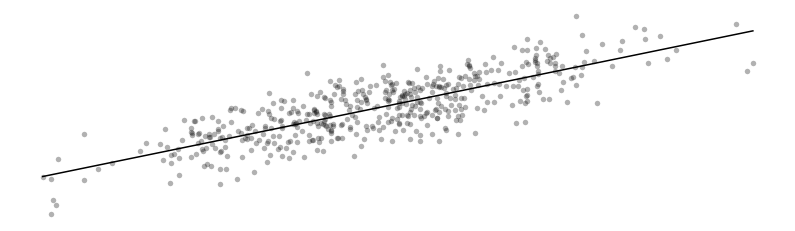

In [27]:
N = 500
x = np.random.randn(N)
y = 0.75*x + 0.5*np.random.randn(N)
X = np.column_stack([np.ones(N),x])
c = la.solve(X.T@X,X.T@y)
t = np.linspace(np.min(x),np.max(x),20)
yhat = c[0] + c[1]*t
plt.figure(figsize=(14,4))
plt.plot(t,yhat,'k-')
plt.scatter(x,y,c='k',s=30,lw=0,alpha=0.3)
plt.axis(False)
plt.savefig('02_05_01.png',dpi=300)
plt.show()

# 3 Eigenvalues

## 3.1 Diagonalization

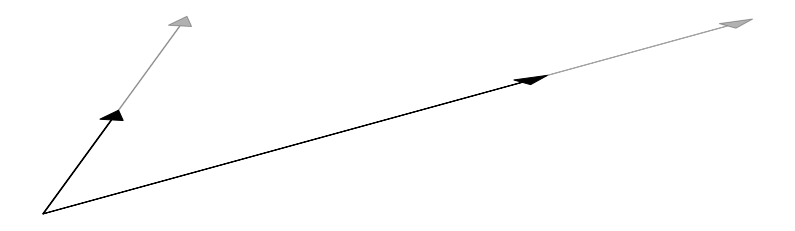

In [37]:
plt.figure(figsize=(14,4))
plt.arrow(0,0,0.2,1,color='k',head_width=0.035,alpha=0.3)
plt.arrow(0,0,0.1,.5,color='k',head_width=0.035)
plt.arrow(0,0,1,1,color='k',head_width=0.035,alpha=0.3)
plt.arrow(0,0,0.7,0.7,color='k',head_width=0.035)
plt.axis(False)
plt.savefig('03_01_01.png',dpi=300)
plt.show()

## 3.2 SVD

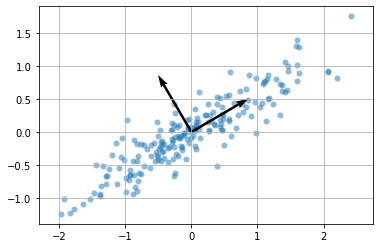

In [16]:
N = 200
x = np.random.randn(N)
y = 0.2*np.random.randn(N)
X = np.column_stack((x,y))
X = X - X.mean(axis=0)
theta = np.pi/6
R = np.array([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])
X = X@R
P,S,QT = la.svd(X)
plt.scatter(X[:,0],X[:,1],alpha=0.5,lw=0)
plt.quiver(QT[0,0],QT[0,1],angles='xy',scale_units='xy',scale=1)
plt.quiver(QT[1,0],QT[1,1],angles='xy',scale_units='xy',scale=1)
plt.grid(True); plt.axis('equal');
plt.savefig('03_02_01.png',dpi=300)
plt.show()

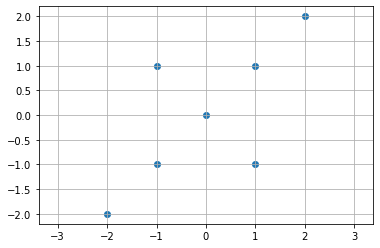

In [17]:
x = [-2,-1,-1,0,1,1,2]
y = [-2,-1,1,0,-1,1,2]
X = np.column_stack((x,y))
plt.scatter(X[:,0],X[:,1],lw=0,s=50)
plt.grid(True); plt.axis('equal');
plt.savefig('03_02_02.png',dpi=300)
plt.show()

In [18]:
from sklearn import datasets

In [19]:
digits = datasets.load_digits()
D = digits['data']

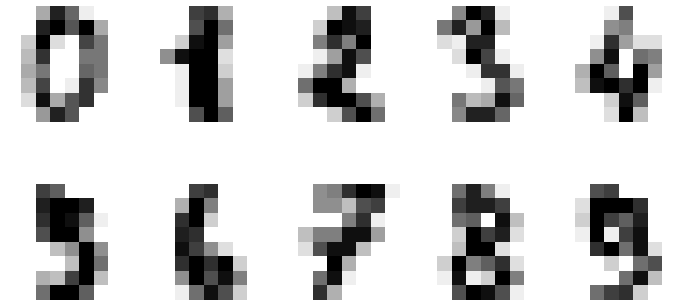

In [20]:
plt.figure(figsize=(12,6))
for n in range(0,10):
    plt.subplot(2,5,n+1)
    plt.imshow(D[n,:].reshape(8,8),cmap='binary')
    plt.axis(False)
plt.savefig('03_02_03.png',dpi=300)
plt.show()

ValueError: cannot reshape array of size 2 into shape (8,8)

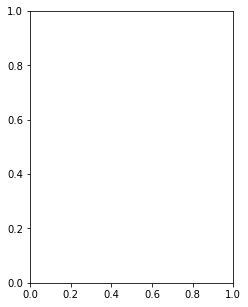

In [21]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.imshow(QT[0,:].reshape(8,8),cmap='binary')
plt.axis(False)
plt.subplot(1,2,2)
plt.imshow(-QT[1,:].reshape(8,8),cmap='binary')
plt.axis(False)
plt.savefig('03_02_04.png',dpi=300)
plt.show()

In [ ]:
X = D - D.mean(axis=0)
P,S,QT = la.svd(X)
X2d = X @ QT[0:2,:].T
plt.figure(figsize=(8,6))
plt.scatter(X2d[:,0],-X2d[:,1],c=digits['target'],cmap=plt.cm.get_cmap('jet', 10),alpha=0.7,lw=0)
plt.axis(False)
plt.colorbar(ticks=range(0,10)); plt.clim([-0.5,9.5]);
plt.savefig('03_02_05.png',dpi=300)
plt.show()

In [ ]:
x = [-2,-1,0,0,0,1,2]
y = [-1,-1,1,0,-1,1,1]
X = np.column_stack((x,y))
plt.figure(figsize=(5,4))
plt.scatter(X[:,0],X[:,1],lw=0,s=50)
plt.grid(True); plt.axis('equal');
plt.savefig('03_02_06.png',dpi=300)
plt.show()

In [ ]:
N = 16
c = np.zeros(N)
c[:4] = np.array([1.0,0.75,0.5,0.25])
A = la.toeplitz(c)
plt.imshow(A,cmap='binary')
plt.xticks([]); plt.yticks([]); plt.colorbar()
#plt.savefig('.png',dpi=300)
plt.show()

In [ ]:
P,S,QT = la.svd(A)
plt.plot(range(1,17),S,'b.-')
plt.grid(True); plt.xlim([1,16]); plt.ylim([0,4])
plt.title("Singular Values of A"); plt.xticks(range(1,17))
plt.xlabel('Index k'); plt.ylabel('Singular value $\sigma_k$');
#plt.savefig('.png',dpi=300)
plt.show()

In [ ]:
plt.figure(figsize=(8,8))
for n in range(0,16):
    plt.subplot(4,4,n+1)
    plt.imshow(S[n]*np.outer(P[:,n],QT[n,:]),cmap='binary')
    plt.axis(False)
#plt.savefig('.png',dpi=300)
plt.show()

In [ ]:
plt.figure(figsize=(8,8))
for n in range(0,16):
    plt.subplot(4,4,n+1)
    Ak = sum([S[n]*np.outer(P[:,n],QT[n,:]) for n in range(0,n+1)])
    plt.imshow(Ak,cmap='binary')
    plt.axis(False)
#plt.savefig('.png',dpi=300)
plt.show()

In [ ]:
N = 4
Z = np.zeros((N,N))
O = np.ones((N,N))
X = np.block([[Z,Z,Z,Z],[Z,O,O,Z],[Z,O,O,Z],[Z,Z,Z,Z]])
plt.imshow(X,cmap='binary')
plt.xticks([])
plt.yticks([])
#plt.savefig('.png',dpi=300)
plt.show()

In [ ]:
B = A @ X @ A + 0.01*np.random.random((16,16))
plt.imshow(B,cmap='binary')
plt.xticks([])
plt.yticks([])
#plt.savefig('.png',dpi=300)
plt.show()

In [ ]:
X1 = la.solve(A,B)
X2 = la.solve(A,X1.T)
plt.imshow(X2,cmap='binary')
plt.xticks([])
plt.yticks([])
#plt.savefig('.png',dpi=300)
plt.show()

In [ ]:
k = 12
Ak_plus = sum([1/S[n]*np.outer(QT[n,:].T,P[:,n].T) for n in range(0,k+1)])
X3 = Ak_plus @ B @ Ak_plus
plt.imshow(X3,cmap='binary')
plt.xticks([])
plt.yticks([])
#plt.savefig('.png',dpi=300)
plt.show()

## 3.3 Computing Eigenvalues

# 4 DFT

## 4.1 Complex Vectors

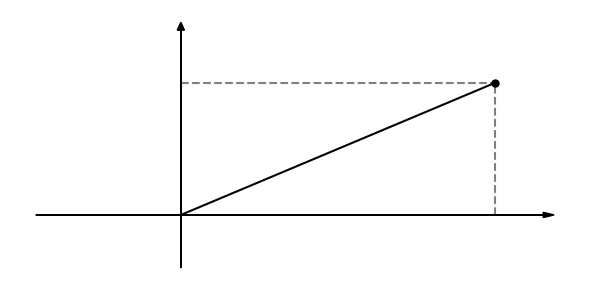

In [51]:
plt.figure(figsize=(6,3))
plt.arrow(-0.4,0,1.4,0,head_width=0.02,color='black')
plt.arrow(0,-0.2,0,0.9,head_width=0.02,color='black')
plt.plot([0,np.sqrt(3)/2],[0,1/2],'k'), plt.plot(np.sqrt(3)/2,1/2,'k.',markersize=10)
plt.plot([np.sqrt(3)/2,np.sqrt(3)/2],[0,1/2],'k--',alpha=0.5)
plt.plot([0,np.sqrt(3)/2],[1/2,1/2],'k--',alpha=0.5)
plt.axis('off')
plt.tight_layout()
plt.savefig('04_01_01.png',dpi=300)
plt.show()

## 4.2 Discrete Fourier Transform

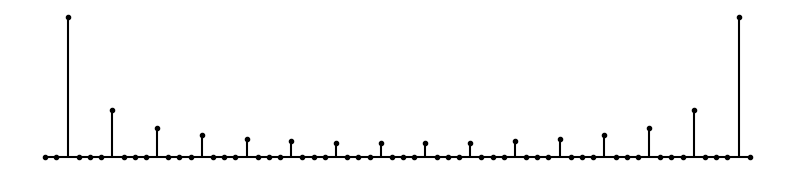

In [22]:
N = 64
n = np.arange(0,N)
t = n/N
k = 2
x = square(2*np.pi*k*t)
y = np.fft.fft(x)

plt.figure(figsize=(10,2))
plt.stem(np.abs(y),markerfmt='k.',linefmt='k.',basefmt='k'), plt.axis(False)
plt.savefig('04_02_01.png',dpi=300)
plt.show()

## 4.3 Frequency, Amplitude and Phase

In [ ]:
N = 100
n = np.arange(0,N)
t = n/N

x = 1 + np.cos(2*np.pi*4*t + np.pi/4)
y = np.fft.fft(x)

plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.stem(np.abs(y),use_line_collection=True)
plt.title('Magnitude'); plt.grid(True); plt.tight_layout()
plt.subplot(2,1,2)
y_angle = np.angle(y)
y_angle[np.abs(y) < 1e-12] = 0.0
plt.stem(y_angle,use_line_collection=True)
plt.title('Phase'); plt.grid(True); plt.ylim([-1,1])
plt.tight_layout()
plt.savefig('04_02_08.png',dpi=300)
plt.show()
#plt.stem(x,use_line_collection=True)
#plt.grid(True); plt.tight_layout()
plt.show()

In [ ]:
N = 100
n = np.arange(0,N)
t = n/N

signals = [[(1,10,np.pi/3)],
           [(1,0,0)],
           [(1,50,0)],
           [(1,5,np.pi/3)],
           [(1,3,0),(1/2,15,0)],
           [(1,25,0)],
           [(1,1,0),(1/2,10,0)]]
n_signals = len(signals) + 1
noises = np.zeros(n_signals); noises[3] = 0.25
X = np.zeros((n_signals,N))
Y = np.zeros((n_signals,N),dtype=np.complex_)
for n,signal in enumerate(signals):
    if noises[n] > 0:
        noise = noises[n]*np.random.randn(N)
    else:
        noise = 0.0
    X[n,:] = sum([s[0]*np.cos(2*np.pi*s[1]*t + s[2]) for s in signal]) + noise
    Y[n,:] = np.fft.fft(X[n,:])
X[-1,0] = 50.0
Y[-1,:] = np.fft.fft(X[-1,:])

plt.figure(figsize=(10,15))
for n in range(n_signals):
    plt.subplot(n_signals,1,n + 1)
    plt.stem(X[n,:],use_line_collection=True)
    plt.title('Signal ' + str(n+1)); plt.grid(True); plt.ylim([-2,2])
plt.ylim([-10,60])
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.savefig('04_02_09.png',dpi=300)
plt.show()

plt.figure(figsize=(10,15))
for i,n in enumerate(np.random.permutation(n_signals)):
    plt.subplot(n_signals,1,i + 1)
    plt.stem(np.abs(Y[n,:]),use_line_collection=True)
    plt.title('Magnitude of DFT ' + str(i+1)); plt.grid(True); plt.ylim([-10,N+10])
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.savefig('04_02_10.png',dpi=300)
plt.show()

## 4.4 Fast Fourier Transform

## 4.5 Convolution and Filtering